# Credit Card Fraud Detection

## Objective
Identify **fraudulent credit card transactions** using machine learning.

## Dataset Overview
The dataset contains anonymized credit card transactions labeled as fraud or not.

- `Time`, `Amount`, and anonymized features `V1` to `V28`
- `Class`: 1 for fraud, 0 for non-fraud

## Workflow
1. Load and explore the dataset
2. Handle class imbalance
3. Feature scaling and model training
4. Evaluate performance

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [5]:
# Load the dataset
data = pd.read_csv("creditcard.csv")
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.shape

(284807, 31)

## Exploratory Data Analysis

Class
0    284315
1       492
Name: count, dtype: int64


<Axes: >

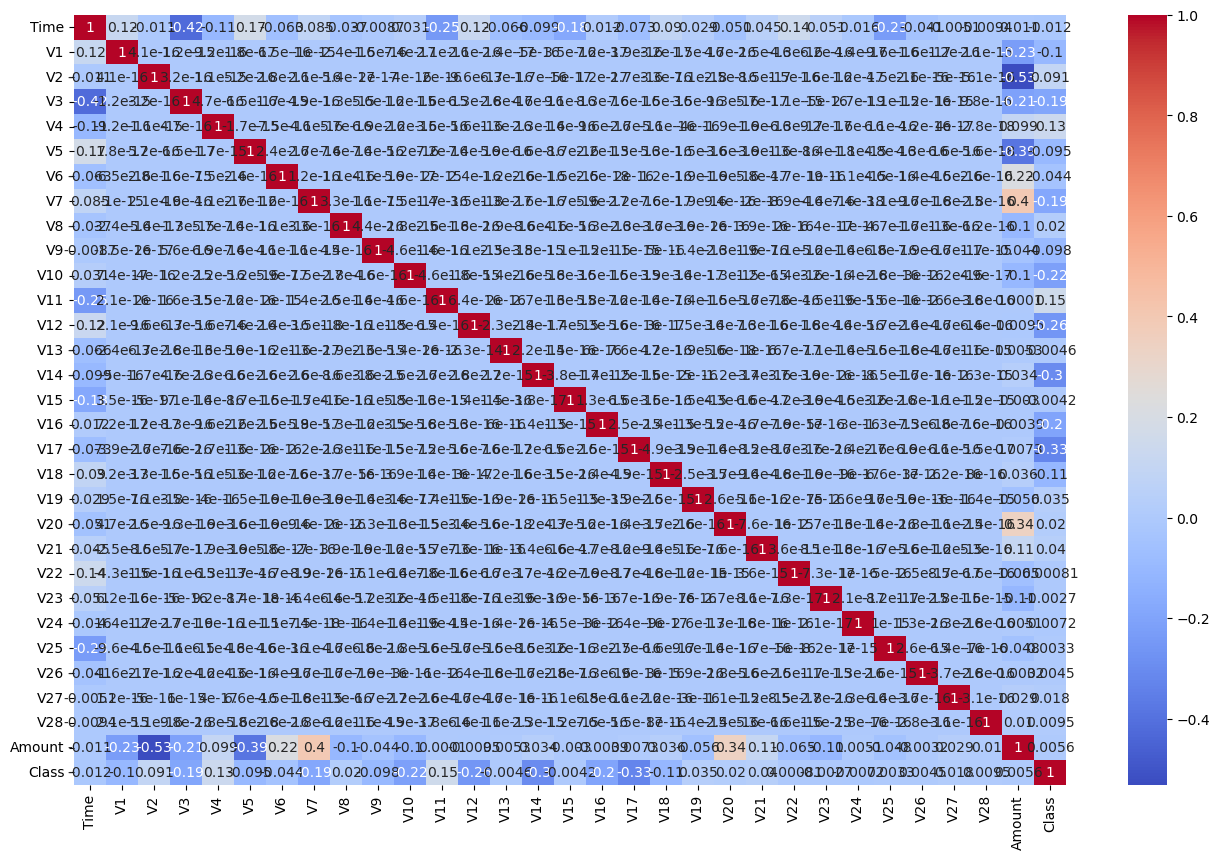

In [50]:
# Count of fraud vs non-fraud
count = data["Class"].value_counts()
print(count)
correlation = data.corr()
# Correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(data = correlation,annot=True,cmap="coolwarm")

In [65]:
data.isnull().sum().sum()

0

In [71]:
data.duplicated().sum()

1081

In [77]:
duplicate = data[data.duplicated()]
print(duplicate)

            Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  .

## Data separation

In [84]:
non_fraud = data[data["Class"] == 0]

In [88]:
non_fraud.shape

(284315, 31)

In [90]:
fraud = data[data["Class"]==1]

In [92]:
fraud.shape

(492, 31)

In [98]:
non_fraud["Amount"].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [100]:
fraud["Amount"].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [122]:
grp = data.groupby("Class").mean()

In [124]:
grp

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Data Preprocessing

In [132]:
# Feature scaling for 'Amount' and 'Time'
scale = StandardScaler()
cols = ["Time","Amount"]
scale_col = scale.fit_transform(data[cols])
data[cols] = scale_col

In [134]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
# trained on balanced data

In [144]:
non_0 = non_fraud.sample(n = 492)

In [146]:
non_0.shape

(492, 31)

In [148]:
fraud.shape

(492, 31)

In [150]:
# concatenation

In [154]:
concat_data = pd.concat([non_0,fraud],axis = 0) 

In [164]:
cols = ["Time","Amount"]
scale_col = scale.fit_transform(concat_data[cols])
concat_data[cols] = scale_col

In [167]:
concat_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169136,0.637151,-2.437804,3.106503,-0.573869,4.106269,-0.951969,1.813884,-1.943958,2.563415,-2.050013,...,0.474226,1.024312,0.026268,-0.109521,-0.330044,0.493113,-0.190350,0.055784,-0.427776,0
231862,1.203798,-1.086816,-0.050254,1.244615,0.287435,0.681792,-0.813185,0.686036,0.056298,0.012725,...,0.203129,0.237790,0.064793,-0.093173,0.132926,-0.707756,0.084203,0.157463,-0.003123,0
212414,1.036121,-0.994883,0.921000,0.557970,-0.939516,1.757107,-0.162726,1.051742,-0.122733,-0.469011,...,-0.446001,-1.083688,-0.464040,0.002596,0.571035,0.300128,-0.046667,-0.126873,-0.411748,0
60360,-0.815451,1.205237,-0.098103,0.422243,0.829423,-0.509855,-0.392271,-0.126768,-0.069238,0.682945,...,-0.101366,-0.108233,-0.149750,0.092711,0.615835,0.458584,-0.022664,0.010762,-0.309835,0
22325,-1.169266,0.988999,-0.112511,0.700514,1.193815,-0.556194,-0.019674,-0.283083,0.193251,0.032391,...,0.290093,0.706735,-0.128719,0.228391,0.437292,-0.226280,0.030238,0.025358,-0.129402,0


In [169]:
concat_data.shape

(984, 31)

In [171]:
concat_data["Class"].value_counts()  # now the data was balanced 

Class
0    492
1    492
Name: count, dtype: int64

In [173]:
concat_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,9.840000e+02,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,9.840000e+02,984.000000
mean,-2.888385e-17,-2.371059,1.805982,-3.481061,2.287857,-1.534787,-0.691842,-2.824231,0.298268,-1.299677,...,0.371841,0.033469,-0.020668,-0.062040,0.018308,0.023173,0.089063,0.034837,-7.220963e-18,0.500000
std,1.000509e+00,5.520074,3.694787,6.232331,3.192442,4.234676,1.759817,5.831114,4.877927,2.308771,...,2.809538,1.167007,1.245737,0.565482,0.685708,0.468976,1.007295,0.419811,1.000509e+00,0.500254
min,-1.826140e+00,-30.552380,-18.701995,-31.103685,-4.071228,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.070631,-4.781606,-1.191042,-7.263482,-1.869290,-4.487607e-01,0.000000
25%,-8.907137e-01,-2.859468,-0.124767,-5.074851,-0.086807,-1.854999,-1.593905,-3.060742,-0.177667,-2.298358,...,-0.156928,-0.510720,-0.240746,-0.405936,-0.328910,-0.281189,-0.059074,-0.061954,-4.427849e-01,0.000000
50%,-1.349972e-01,-0.835200,0.948431,-1.354141,1.372372,-0.393066,-0.641405,-0.713248,0.177988,-0.717292,...,0.155099,0.067657,-0.035345,-0.007452,0.052958,-0.024355,0.060778,0.037627,-3.742252e-01,0.500000
75%,9.573176e-01,1.044389,2.783339,0.404205,4.229802,0.533758,0.071869,0.206859,0.876327,0.164083,...,0.646079,0.594890,0.193014,0.352335,0.394949,0.309251,0.452145,0.209281,1.752831e-03,1.000000
max,1.722498e+00,2.346272,22.057729,3.387833,12.114672,11.095089,6.474115,5.802537,20.007208,5.178968,...,27.202839,8.361985,13.218751,3.378881,3.590787,2.745261,3.222753,2.048234,9.399143e+00,1.000000


## Model Training

In [342]:
# Define features and target
x = concat_data.iloc[:,:-1]
y = concat_data["Class"]
# Train-test split with stratification
x_train,x_test,y_train ,y_test = train_test_split(x,y,random_state=42,test_size=0.3)
# Logistic Regression
model = LogisticRegression()
model.fit(x_train,y_train)
# Predictions
y_true = model.predict(x_test)
model.score(x_test,y_test)

0.9222972972972973

In [396]:
cred = pd.DataFrame(y_true,columns=["y_true"])
cred.to_csv("fraud_validation.csv",index = False)

In [344]:
cf = confusion_matrix(y_true,y_test)

In [346]:
print(cf)

[[142  15]
 [  8 131]]


In [348]:
y_test.shape

(296,)

### rough

In [351]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [353]:
x  = data.iloc[:,:-1]
y = data["Class"]

In [355]:
x_train,x_test,y_train ,Y_test = train_test_split(x,y,random_state=42,test_size=0.3,stratify=y)

In [357]:
x_test.shape

(85443, 30)

In [359]:
model.fit(x_train,y_train)

LogisticRegression()

In [360]:
y_= model.predict(x_test)

In [363]:
y_.shape

(85443,)

In [365]:
model.score(x_test,Y_test)

0.9991573329588147

In [367]:
cc = confusion_matrix(y_,Y_test)

In [369]:
cc

array([[85280,    57],
       [   15,    91]], dtype=int64)

## Evaluation

In [392]:
# Confusion matrix and classification report
cf = confusion_matrix(y_true,y_test)
print("confusion_matrix:-\n",cf)
ac = accuracy_score(y_true,y_test)
print("accuracy_score:-",ac)
cs = classification_report(y_true,y_test)
print("classification_report:-")
print(cs)


confusion_matrix:-
 [[142  15]
 [  8 131]]
accuracy_score:- 0.9222972972972973
classification_report:-
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       157
           1       0.90      0.94      0.92       139

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



In [394]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np

# Assuming your model is named 'model' and you have X, y
scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

Cross-validation scores: [0.99908711 0.99929778 0.99892909 0.99926265 0.99906954]
Mean Accuracy: 0.9991292344415015
Standard Deviation: 0.0001353531742688298


## Conclusion
- Used logistic regression for binary classification.
- Addressed feature scaling and class imbalance.
- Future work: try ensemble methods (e.g. Random Forest, XGBoost) or SMOTE for better fraud detection.